# Lasso coefficients comparison
---
***Objective:*** The objetive of this notebook is to apply the Lasso regression with several kinds of priors and compare it's coefficients.

***Author:*** Bruno G. de Oliveira

### 1) Importing packages

In [1]:
import sys 
sys.path.append('../')

# Data manipulation 
import pandas as pd 
import numpy as np 
pd.options.display.max_rows=None

# Dataset creation
from dataset.generate_regression_data import RegressionData

# Probabilistic programming
import pymc3 as pm 
import theano as T
from models.bayesian_linear_regression import bayesian_lr

# Data visualization
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline 

### 2) Create toy dataset

This dataset is built from standard normal distribution where the first five features have non zero coefficients.

In [2]:
args = {
    'n_samples': 100,
    'n_features': 10,
    'nonzero_features': 4,
    'seed': 42
}

In [3]:
data = RegressionData(args)
X, y, coefs = data.generate()

In [4]:
X.shape

(100, 10)

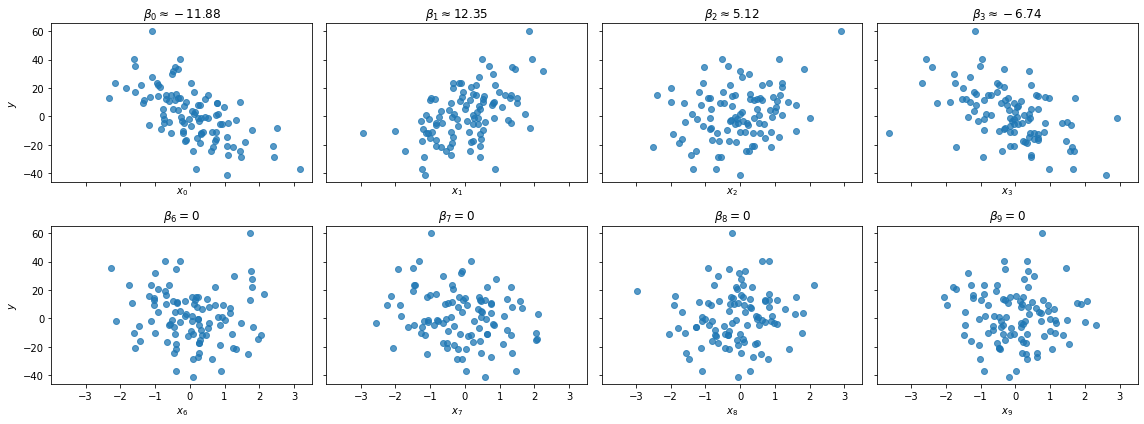

In [5]:
_ = data.plot(X, y, coefs)

### 3) Exploratory data analysis

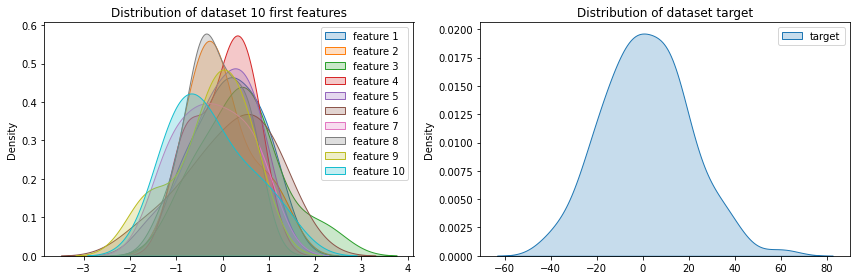

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4), tight_layout=True)

for i in range(X[:, :10].shape[1]):
    sns.kdeplot(X[i], shade=True, label=f'feature {i + 1}', ax=ax[0])
ax[0].legend()
ax[0].set_title('Distribution of dataset 10 first features')

sns.kdeplot(y, shade=True, label='target', ax=ax[1])
ax[1].legend()
ax[1].set_title('Distribution of dataset target');

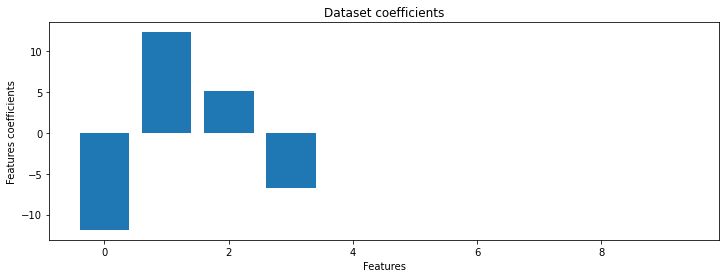

In [7]:
plt.figure(figsize=(12,4))
plt.bar(range(coefs.size), coefs)
plt.xlabel('Features')
plt.ylabel('Features coefficients')
plt.title('Dataset coefficients');

### 4) Constructing the models

In [8]:
X_t = T.shared(X)

#### 4.1) Standard bayesian regression:

$Y \sim \mathcal{N}(X\beta, \sigma^2I)$ 
 
$\beta \sim \mathcal{N}(0, \sigma^2)$ 

$\sigma \sim \left|\mathcal{N}(0, 1)\right|$


In [9]:
bayes_lr = bayesian_lr(X, y)

In [10]:
with bayes_lr:
    trace = pm.sample(draws=1000, return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, beta, intercept]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 38 seconds.


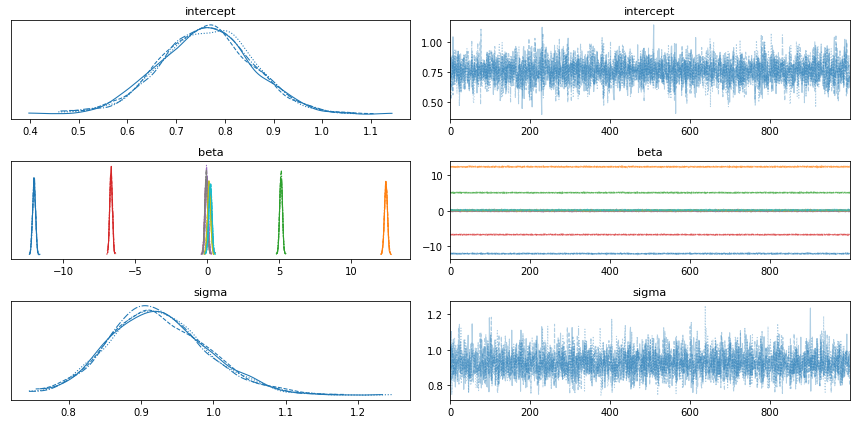

In [11]:
pm.plot_trace(trace)
plt.tight_layout();

In [12]:
trace_summary = pm.summary(trace, round_to=2)

In [13]:
beta_idx = [idx for idx in trace_summary.index if idx.startswith('beta')]
beta_coefs = trace_summary.loc[beta_idx, 'mean']

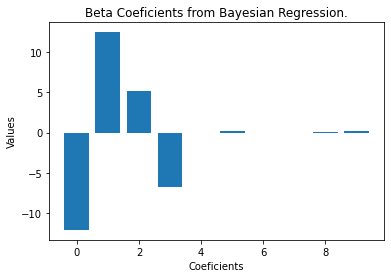

In [14]:
plt.bar(range(beta_coefs.size), beta_coefs)
plt.title('Beta Coeficients from Bayesian Regression.')
plt.xlabel('Coeficients')
plt.ylabel('Values');